# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']
btc_price
# Fetch current ETH price
eth_price = requests.get(eth_url).json()
eth_price= eth_price['data']['1027']['quotes']['USD']['price']
eth_price
# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $52363.20
The current value of your 5.3 ETH is $17201.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
# Create the Alpaca API object
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [8]:
# Format current date as ISO format
# YOUR CODE HERE!
#start_date = pd.Timestamp("2022-04-05", tz="America/New_York").isoformat()
#end_date = pd.Timestamp("2022-04-05", tz="America/New_York").isoformat()
current_date = pd.Timestamp("2022-04-05", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 10000 days of data)

# YOUR CODE HERE!
ticker_data = api.get_bars(
    tickers,
    timeframe,
    start=current_date,
    end=current_date,
    limit= 10000
).df

# Preview DataFrame
ticker_data.head()



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-04-05 04:00:00+00:00,106.60,106.625,105.74,105.76,11018430,34684,105.931526,AGG
2022-04-05 04:00:00+00:00,455.23,457.830,449.82,451.03,74022189,644313,453.412462,SPY


In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_ticker.index = df_ticker.index.date
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])



# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $105.76
Current SPY closing price: $451.03


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22551.50
The current value of your 200 AGG shares is $21152.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value


# Create savings DataFrame
# YOUR CODE HERE!
savings_data = {
    "Amount": [crypto, shares]
}
# Set the tickers
rows = ["Crypto", "Shares"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings_data, index=rows)


# Display savings DataFrame
display(df_savings)

,Amount
Crypto,69564.244
Shares,43703.500


<AxesSubplot:title={'center':'Savings Portfolio Composition'}, ylabel='Amount'>

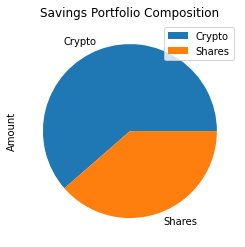

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Savings Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations, you have a healthy savings portfolio!")
elif total_savings == emergency_fund:
    print("Congratulations, you have reached your savings goal!")
elif total_savings < emergency_fund:
    difference = emergency_fund - total_savings
    print(f"You are ${difference} away from savings goal.")
    

Congratulations, you have a healthy savings portfolio!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
Five_Year_data = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=10000
).df

ticker_data.head()
# Display sample data


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.61,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.81,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.86,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.14,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.97,2718710,12697,111.031967,AGG


In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
AGG = Five_Year_data[Five_Year_data["symbol"]=="AGG"].drop("symbol", axis=1)
SPY = Five_Year_data[Five_Year_data["symbol"]=="SPY"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
Five_Year_data = pd.concat([AGG, SPY], axis=1, keys=["AGG","SPY"])

# Display sample data
Five_Year_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [35]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_STOCKS = MCSimulation(
    portfolio_data = Five_Year_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30,
   # limit=1000
)
# Print the simulation input data
MC_STOCKS.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_STOCKS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 110.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 120.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 130.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 140.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 150.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 160.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 170.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 180.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 190.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 200.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 210.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 220.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 230.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 240.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 250.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 260.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 270.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 280.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 290.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 300.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 310.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 320.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 330.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 340.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 350.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 360.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 370.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 380.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 390.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 400.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 410.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 420.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 430.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 440.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 450.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 460.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 470.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 480.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 490.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007444,0.993947,0.993509,1.002008,0.987442,1.015792,0.997389,1.001609,0.992724,1.003500,...,1.008976,1.005096,0.998574,0.988352,0.992273,0.994279,1.002125,0.992479,0.991349,1.003414
2,1.009973,0.981827,0.992996,1.001311,0.975092,1.014140,0.986526,1.000703,0.991278,0.993757,...,1.021033,1.008804,0.999330,1.001146,0.997626,0.999363,1.010537,0.989822,0.993921,1.011044
3,1.007131,0.979853,0.994076,0.993938,0.975471,1.019052,0.983420,1.010031,0.997419,0.987821,...,1.019437,1.017114,1.007180,1.002481,1.002269,0.997986,1.022218,0.980951,0.992969,1.007330
4,1.007349,0.985744,0.995183,0.993810,0.963321,1.017052,0.966188,1.009981,1.003469,0.978675,...,1.014758,1.022255,1.013022,0.991653,1.005366,1.011085,1.002792,0.980007,0.987045,1.010583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,13.243539,5.272946,14.915906,4.794134,12.652682,10.883553,21.768330,17.700647,7.571609,78.952707,...,32.983353,28.396359,26.585614,32.641209,5.591123,34.126094,32.773771,11.341620,23.225206,18.994905
7557,13.335561,5.202724,14.854100,4.771029,12.658273,11.049649,21.820907,17.533009,7.647122,80.123801,...,33.123084,28.083920,26.731371,32.803343,5.628849,34.128221,32.814680,11.366572,23.188867,19.102124
7558,13.244186,5.238909,15.159589,4.774971,12.635487,11.138533,21.873718,17.483980,7.594478,80.229298,...,33.505881,27.958300,26.796900,32.782492,5.646234,34.094169,32.719511,11.397703,23.178493,18.967000
7559,13.232670,5.305980,15.218723,4.784583,12.735335,11.402412,21.959882,17.570381,7.628830,80.096469,...,33.596847,27.823239,26.640764,32.704361,5.711792,34.352795,32.999625,11.472088,23.469784,18.824672


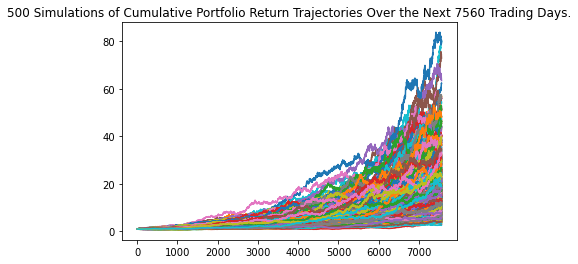

In [37]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_STOCKS.plot_simulation()

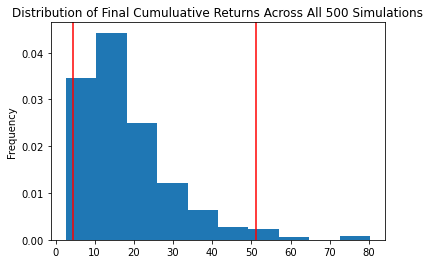

In [38]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_STOCKS.plot_distribution()

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_sum = MC_STOCKS.summarize_cumulative_return()

# Print summary statistics
print(stats_sum)


count           500.000000
mean             18.298142
std              12.053345
min               2.613404
25%              10.083642
50%              15.488034
75%              23.469092
max              80.321368
95% CI Lower      4.339307
95% CI Upper     51.116566
Name: 7560, dtype: float64


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats_sum[8]*initial_investment,2)
ci_upper = round(stats_sum[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $86786.15 and $1022331.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(stats_sum[8]*initial_investment,2)
ci_upper = round(stats_sum[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $130179.22 and $1533496.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_STOCKS = MCSimulation(
    portfolio_data = Five_Year_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5,
   # limit=1000
)
# Print the simulation input data
MC_STOCKS.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_STOCKS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 110.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 120.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 130.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 140.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 150.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 160.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 170.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 180.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 190.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 200.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 210.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 220.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 230.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 240.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 250.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 260.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 270.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 280.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 290.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 300.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 310.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 320.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 330.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 340.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 350.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 360.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 370.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 380.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 390.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 400.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 410.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 420.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 430.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 440.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 450.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 460.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 470.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 480.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 490.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004836,1.004588,1.000030,0.999462,0.995051,0.977570,0.991222,0.995497,1.005131,0.999897,...,1.002744,0.991330,1.000450,0.997489,1.006604,1.008341,1.009799,0.988627,1.000387,1.005025
2,1.002078,1.008779,0.989851,1.002512,0.997343,0.989942,0.997114,1.013285,0.999623,0.993115,...,1.008708,0.984097,0.991525,0.999071,0.998430,1.004609,1.006365,0.982629,1.001219,0.999861
3,1.015335,1.003634,0.990432,0.995776,1.004926,1.002182,1.010751,1.018871,1.011348,0.991846,...,1.001109,0.996741,0.996697,1.003178,0.993022,0.997485,1.008027,0.966293,0.998992,1.001549
4,1.034255,1.002070,1.004303,1.004181,1.008628,0.995532,1.025331,1.022474,1.006433,1.005189,...,0.996739,0.982637,0.998747,0.999294,1.002464,0.992811,1.012363,0.974597,1.002624,0.996841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.992591,1.135308,0.898126,1.934734,1.075326,1.668427,1.818563,2.031775,0.934888,1.192473,...,1.811799,1.452509,1.863987,1.816549,1.256180,1.747364,1.846081,1.113867,1.201066,1.311041
1257,1.995060,1.124798,0.908571,1.944819,1.080736,1.655064,1.815519,2.034797,0.941706,1.187856,...,1.815537,1.457805,1.864408,1.824241,1.251543,1.738826,1.838998,1.120073,1.199780,1.299636
1258,1.994297,1.121916,0.906773,1.960268,1.094607,1.669239,1.813050,2.051788,0.950143,1.176183,...,1.815531,1.455568,1.857386,1.827564,1.257309,1.732304,1.834675,1.116555,1.209172,1.290715
1259,2.004376,1.125403,0.897615,1.955745,1.097898,1.679429,1.806976,2.041175,0.957776,1.174697,...,1.855328,1.469745,1.850492,1.804906,1.239477,1.742116,1.851333,1.117315,1.208713,1.270470


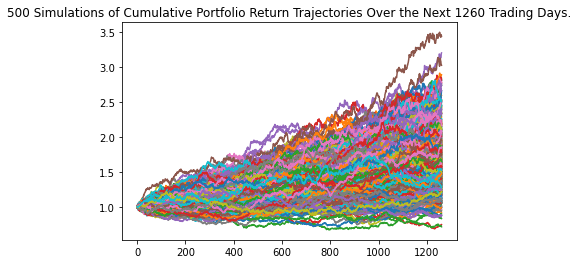

In [45]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_STOCKS.plot_simulation()

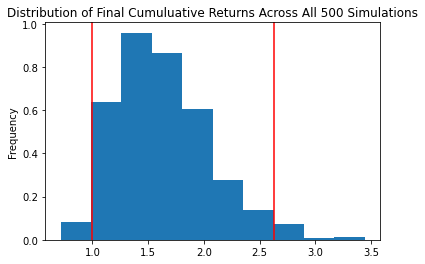

In [46]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_STOCKS.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_sum = MC_STOCKS.summarize_cumulative_return()

# Print summary statistics
print(stats_sum)




count           500.000000
mean              1.630349
std               0.425169
min               0.713612
25%               1.319488
50%               1.561141
75%               1.878974
max               3.443993
95% CI Lower      0.992311
95% CI Upper      2.629595
Name: 1260, dtype: float64


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [55]:
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats_sum[8]*initial_investment,2)
ci_upper = round(stats_sum[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $24655.88 and $96548.53


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_STOCKS = MCSimulation(
    portfolio_data = Five_Year_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10,
   # limit=1000
)
# Print the simulation input data
MC_STOCKS.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_STOCKS.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 110.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 120.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 130.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 140.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 150.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 160.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 170.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 180.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 190.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 200.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 210.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 220.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 230.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 240.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 250.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 260.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 270.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 280.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 290.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 300.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 310.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 320.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 330.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 340.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 350.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 360.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 370.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 380.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 390.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 400.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 410.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 420.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 430.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 440.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 450.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 460.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 470.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 480.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

Running Monte Carlo simulation number 490.


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homewor

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991154,0.995315,0.992420,1.017230,0.992600,0.997853,0.996906,0.998257,1.008751,1.002526,...,0.991273,0.994262,1.004219,1.011732,1.012246,0.998210,1.003598,0.993501,0.998772,0.999623
2,0.993540,0.989854,0.999141,1.023100,0.985604,1.000191,0.998465,1.002876,1.005262,1.018074,...,0.986380,0.989973,1.010064,1.019462,1.006000,0.994820,1.010803,0.991502,1.007798,1.004707
3,0.978046,0.982769,1.004648,1.019175,0.991831,1.000050,1.000900,1.002550,1.004126,1.016947,...,0.997597,0.981823,0.998323,1.017032,1.002726,0.994355,1.007649,0.991682,1.001607,0.997069
4,0.976654,0.965977,1.009053,1.018307,0.995616,1.005453,1.009210,1.000899,1.004011,1.004804,...,0.999067,0.982626,0.995467,1.018752,1.002528,0.994178,1.001007,0.987465,1.005781,0.998327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.343131,2.399746,3.110662,1.639651,2.769627,4.466996,1.774923,1.282461,2.685813,2.186056,...,3.195053,2.475625,5.692735,1.358522,5.277243,2.026791,3.673338,1.203445,2.095483,3.186036
2517,2.343755,2.428141,3.128103,1.634958,2.768550,4.475824,1.774900,1.296105,2.699339,2.188466,...,3.186980,2.472527,5.705227,1.358864,5.343604,2.045066,3.684269,1.202884,2.093133,3.173869
2518,2.339377,2.438551,3.097882,1.617067,2.740844,4.397438,1.773988,1.308101,2.695407,2.189734,...,3.227818,2.489152,5.736338,1.361444,5.288156,2.032615,3.652274,1.215630,2.066741,3.187180
2519,2.363713,2.446731,3.095072,1.637939,2.749740,4.459549,1.771685,1.316152,2.689070,2.202641,...,3.278142,2.461080,5.771217,1.376487,5.240794,2.022227,3.616901,1.222114,2.094712,3.186626


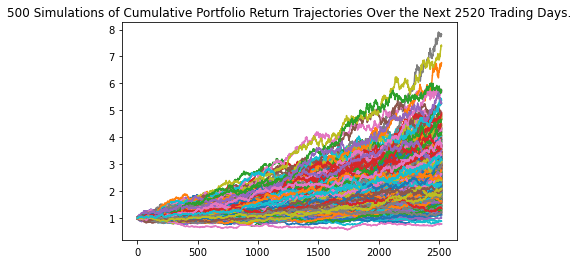

In [51]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_STOCKS.plot_simulation()

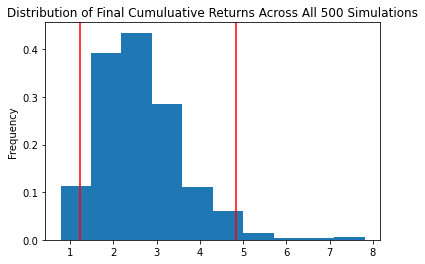

In [52]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_STOCKS.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
stats_sum = MC_STOCKS.summarize_cumulative_return()

# Print summary statistics
print(stats_sum)


count           500.000000
mean              2.643994
std               0.963247
min               0.775388
25%               1.980305
50%               2.535338
75%               3.173614
max               7.812814
95% CI Lower      1.232794
95% CI Upper      4.827426
Name: 2520, dtype: float64


C:\Users\edelb\Desktop\ASU-VIRT-FIN-PT-03-2022-U-LOL\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [54]:
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(stats_sum[8]*initial_investment,2)
ci_upper = round(stats_sum[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $24655.88 and $96548.53
